In [6]:
import random  
# Rule-Based Cancer Detection
# SENSOR → small simulated dataset
# 0 = malignant, 1 = benign
samples = [
    {"radius": 14, "texture": 18, "smoothness": 0.3, "label": 0},
    {"radius": 10, "texture": 12, "smoothness": 0.4, "label": 1},
    {"radius": 17, "texture": 25, "smoothness": 0.2, "label": 0},
    {"radius": 11, "texture": 15, "smoothness": 0.5, "label": 1},
]
# AGENT → decision function
def agent(sample):
    score = 0
    if sample["radius"] > 15:
        score += 1
    if sample["texture"] > 20:
        score += 1
    if sample["smoothness"] < 0.25:
        score += 1
    if score >= 2:
        return 0  # Malignant
    else:
        return 1  # Benign
# AGENT makes predictions
for i, s in enumerate(samples):
    prediction = agent(s)
    print(f"\n--- Sample {i+1} ---")
    print(f"Sensor Data (Cell Features):")
    print(f"Radius: {s['radius']}")
    print(f"Texture: {s['texture']}")
    print(f"Smoothness: {s['smoothness']}")
    prediction = agent(s)
    print(f"\nAgent Decision: {'Malignant' if prediction==0 else 'Benign'}")
    print(f"Actual Label: {'Malignant' if s['label']==0 else 'Benign'}")
    print("-------------------------------")


--- Sample 1 ---
Sensor Data (Cell Features):
Radius: 14
Texture: 18
Smoothness: 0.3

Agent Decision: Benign
Actual Label: Malignant
-------------------------------

--- Sample 2 ---
Sensor Data (Cell Features):
Radius: 10
Texture: 12
Smoothness: 0.4

Agent Decision: Benign
Actual Label: Benign
-------------------------------

--- Sample 3 ---
Sensor Data (Cell Features):
Radius: 17
Texture: 25
Smoothness: 0.2

Agent Decision: Malignant
Actual Label: Malignant
-------------------------------

--- Sample 4 ---
Sensor Data (Cell Features):
Radius: 11
Texture: 15
Smoothness: 0.5

Agent Decision: Benign
Actual Label: Benign
-------------------------------


In [9]:
# BFS-Based Cancer Detection 
def bfs_cancer_detection(features):
    queue = [["radius"], ["texture"], ["smoothness"]]
    visited = []
    score = 0
    while queue:
        path = queue.pop(0)
        current = path[-1]
        visited.append(current)
        # Rule-based check
        if current == "radius" and features["radius"] > 18:
            score += 1
        if current == "texture" and features["texture"] > 20:
            score += 1
        if current == "smoothness" and features["smoothness"] < 0.5:
            score += 1
        if len(visited) == 3:
            break
    if score >= 2:
        return "Cancer Detected by BFS"
    else:
        return "No Cancer (BFS)"
# TEST
data = {"radius": 19, "texture": 21, "smoothness": 0.4}
print(bfs_cancer_detection(data))


Cancer Detected by BFS


In [10]:
# DFS-Based Cancer Detection 
def dfs_cancer_detection(features):
    stack = ["radius", "texture", "smoothness"]
    visited = []
    score = 0
    while stack:
        current = stack.pop()
        visited.append(current)
        if current == "radius" and features["radius"] > 18:
            score += 1
        if current == "texture" and features["texture"] > 20:
            score += 1
        if current == "smoothness" and features["smoothness"] < 0.5:
            score += 1
        if len(visited) == 3:
            break
    if score >= 2:
        return "Cancer Detected (DFS)"
    else:
        return "No Cancer (DFS)"
# TEST
print(dfs_cancer_detection(data))


Cancer Detected (DFS)


In [11]:
# Greedy Search for Cancer Detection 
def greedy_cancer_detection(features):
    priority = ["texture", "radius", "smoothness"]
    score = 0
    for current in priority:
        if current == "radius" and features["radius"] > 18:
            score += 1
        if current == "texture" and features["texture"] > 20:
            score += 1
        if current == "smoothness" and features["smoothness"] < 0.5:
            score += 1
        if score >= 2:
            break
    if score >= 2:
        return "Cancer Detected (Greedy)"
    else:
        return "No Cancer (Greedy)"
# TEST
print(greedy_cancer_detection(data))

Cancer Detected (Greedy)


In [12]:
# A* Cancer Detection 
def astar_cancer_detection(features):
    open_list = [
        ("texture", 0),
        ("radius", 0),
        ("smoothness", 0)
    ]
    def heuristic(x):
        if x == "texture": return 1
        if x == "radius": return 2
        return 3
    score = 0
    # calculate f(n) manually
    for i in range(len(open_list)):
        feature, g = open_list[i]
        f = g + heuristic(feature)
        open_list[i] = (feature, f)
    # sort manually
    for i in range(len(open_list)-1):
        for j in range(i+1, len(open_list)):
            if open_list[i][1] > open_list[j][1]:
                open_list[i], open_list[j] = open_list[j], open_list[i]
    for feature, f in open_list:
        if feature == "radius" and features["radius"] > 18:
            score += 1
        if feature == "texture" and features["texture"] > 20:
            score += 1
        if feature == "smoothness" and features["smoothness"] < 0.5:
            score += 1
    if score >= 2:
        return "Cancer Detected (A*)"
    else:
        return "No Cancer (A*)"
# TEST
print(astar_cancer_detection(data))


Cancer Detected (A*)


In [14]:
# Probability-based Cancer Detection 
def cancer_probability(features):
    total_features = 3
    high_risk = 0
    # Conditions (simple medical-inspired rules)
    if features["radius"] > 18:
        high_risk += 1
    if features["texture"] > 20:
        high_risk += 1
    if features["smoothness"] < 0.5:
        high_risk += 1
    # Probability theorem
    probability = high_risk / total_features
    # Agent Decision
    if probability >= 0.67:   # 67% or more = likely cancer
        decision = "Cancer Detected"
    else:
        decision = "No Cancer Detected"
    return probability, decision
# TEST INPUT
data = {
    "radius": 19,
    "texture": 21,
    "smoothness": 0.4
}
prob, result = cancer_probability(data)
print("Probability of Cancer:",prob)
print("Decision:",result)

Probability of Cancer: 1.0
Decision: Cancer Detected


In [16]:
# Linear Algebra Based Cancer Scoring (Dot Product Method)
def cancer_linear_algebra(features):
    # Feature vector
    X = [
        features["radius"],
        features["texture"],
        features["smoothness"]
    ]
    # Weight vector (manually set)
    W = [0.5, 0.3, -0.2]
    # Dot Product
    score = (W[0] * X[0]) + (W[1] * X[1]) + (W[2] * X[2])
    # Decision
    if score > 20:
        return score, "Cancer Detected"
    else:
        return score, "No Cancer"
data = {"radius": 19, "texture": 21, "smoothness": 0.4}
score, result = cancer_linear_algebra(data)
print("Score:", score)
print("Decision:",result)

Score: 15.72
Decision: No Cancer


In [18]:
# Variance-Based Cancer Detection 
def variance_cancer_detection(features):
    # Healthy average (manually set)
    mean_values = {
        "radius": 15,
        "texture": 17,
        "smoothness": 0.6
    }
    variances = {}
    # variance = (x - mean)^2
    variances["radius"] = (features["radius"] - mean_values["radius"]) ** 2
    variances["texture"] = (features["texture"] - mean_values["texture"]) ** 2
    variances["smoothness"] = (features["smoothness"] - mean_values["smoothness"]) ** 2
    # Total variance
    total_variance = variances["radius"] + variances["texture"] + variances["smoothness"]
    # Decision based on how abnormal the sample is
    if total_variance > 20:
        decision = "Cancer Detected (High Variance)"
    else:
        decision = "No Cancer (Low Variance)"
    return variances, total_variance, decision
# TEST SAMPLE
data = {
    "radius": 19,
    "texture": 22,
    "smoothness": 0.4
}
v, tv, d = variance_cancer_detection(data)
print("Individual Variances:",v)
print("Total Variance:",tv)
print("Decision:",d)

Individual Variances: {'radius': 16, 'texture': 25, 'smoothness': 0.03999999999999998}
Total Variance: 41.04
Decision: Cancer Detected (High Variance)


In [19]:
# Cancer probability calculation using bias
# doctor/test raw result (output)
raw_output = 0.62   # means 62% probability from test
# bias (model correction factor)
bias = 0.08         # means model believes +8% more chance
# using your formula: input = output + bias
final_probability = raw_output + bias
# probability should not exceed 1.0
if final_probability > 1.0:
    final_probability = 1.0
print("Raw test probability:", raw_output)
print("Bias added:", bias)
print("Final cancer probability after bias:", final_probability)

Raw test probability: 0.62
Bias added: 0.08
Final cancer probability after bias: 0.7


Cancer Probability: 0.67
No Cancer Probability: 0.33


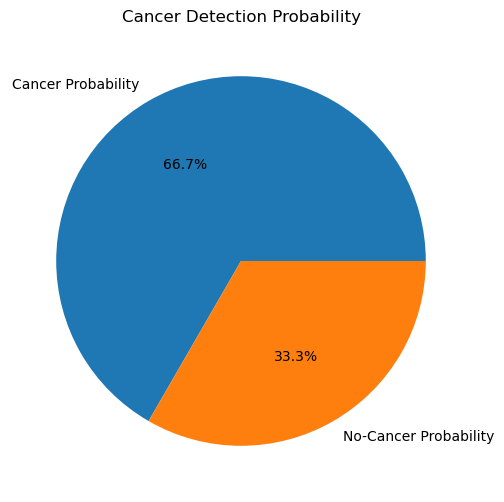

In [21]:
# CALCULATE CANCER PROBABILITY + data representation using PIE CHART
# Example input data (you can change these)
# 1 = symptom present, 0 = symptom absent
cell_size = 1
shape_irregularity = 1
DNA_mutation = 0
# Step 1: Probability logic (very simple model)
score = cell_size + shape_irregularity + DNA_mutation
cancer_probability = score / 3   # Maximum score = 3
no_cancer_probability = 1 - cancer_probability
print("Cancer Probability:", round(cancer_probability, 2))
print("No Cancer Probability:", round(no_cancer_probability, 2))
# Step 2: Draw PIE CHART
import matplotlib.pyplot as plt
labels = ['Cancer Probability', 'No-Cancer Probability']
sizes = [cancer_probability, no_cancer_probability]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Cancer Detection Probability')
plt.show()

In [25]:
import math
# ---- Labelled Data (Supervised) ----
# radius values (example)
data = [13, 14, 15, 14, 13, 16, 18, 12, 14, 13]
labels = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]   # 1 = cancer, 0 = no cancer
# ---- Local maxima / minima detection ----
def local_status(arr, i):
    left = arr[i-1] if i > 0 else None
    right = arr[i+1] if i < len(arr)-1 else None
    val = arr[i]
    greater_left  = (left is None) or (val > left)
    greater_right = (right is None) or (val > right)
    less_left     = (left is None) or (val < left)
    less_right    = (right is None) or (val < right)
    if greater_left and greater_right:
        return "max"
    if less_left and less_right:
        return "min"
    return "none"
# ---- Test input ----
test_radius = 14
# Find nearest value index
nearest_index = min(range(len(data)), key=lambda i: abs(data[i] - test_radius))
extrema = local_status(data, nearest_index)
# ---- Base probability (sigmoid of bias) ≈ 12% ----
bias = -1.99
base_prob = 1 / (1 + math.exp(-bias))   # ≈ 0.12
# ---- Adjust using local maxima/minima ----
if extrema == "max":
    final_prob = base_prob + 0.03
elif extrema == "min":
    final_prob = base_prob - 0.02
else:
    final_prob = base_prob
# Keep in range
final_prob = max(0, min(1, final_prob))
# ---- OUTPUT ----
print("Test radius:", test_radius)
print("Nearest data index:", nearest_index + 1)
print("Local extrema:", extrema)
print("Final cancer probability:", round(final_prob*100,1),"%")

Test radius: 14
Nearest data index: 2
Local extrema: none
Final cancer probability: 12.0 %


C:\Users\dell\AppData\Local\Temp\ipykernel_9628\953770359.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)


Predictions on test data: [ 17.34857792  78.70609483 366.14661267]


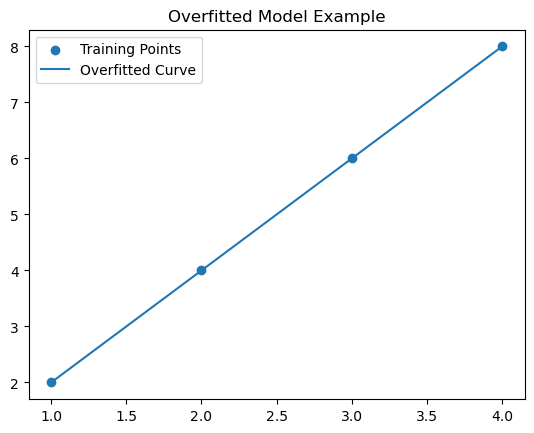

In [26]:
# challenges can be that the input data(sensed by sensor)does not exactly matches the output 
#it can be overfitted or underfitted
import numpy as np
import matplotlib.pyplot as plt
# ----- Small Training Data -----
X_train = np.array([1, 2, 3, 4])
y_train = np.array([2, 4, 6, 8])   # perfect linear pattern
# ----- Overfitted Model (very high degree polynomial) -----
degree = 10  # TOO large for 4 data points → overfitting occurs
coeffs = np.polyfit(X_train, y_train, degree)
model = np.poly1d(coeffs)
# ----- Test Data -----
X_test = np.array([5, 6, 7])
y_pred = model(X_test)
print("Predictions on test data:", y_pred)
# ----- Plot for understanding -----
plt.scatter(X_train, y_train, label="Training Points")
plt.plot(X_train, model(X_train), label="Overfitted Curve")
plt.title("Overfitted Model Example")
plt.legend()
plt.show()